13.866141732283406 382.25984251968515 0.05562959190819605


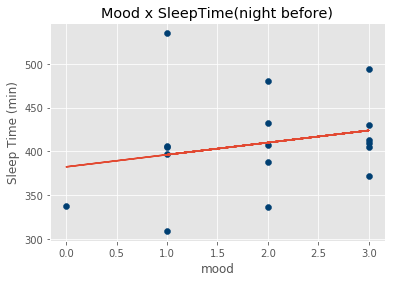

In [23]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

sleepTime = np.array([336, 372, 388, 535, 432, 494, 405, 397, 309, 413, 407, 480, 337, 430, 410, 405, 406], dtype=np.float64)
mood = np.array([2, 3, 2, 1, 2, 3, 1, 1, 1, 3, 2, 2, 0, 3, 3, 3, 1], dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(mood)*mean(sleepTime)) - mean(mood*sleepTime)) /
         ((mean(mood)*mean(mood)) - mean(mood*mood)))
    
    b = mean(sleepTime) - m*mean(mood)
    # R-squared: % variance in y explained by model = 1 - Unexplained/Total Variance = 1 - var(residual)/var(y) 
    # --> 1- sum((y- y_pred)^2)/sum((y-y_mean)^2) 
    # Numpy has a default function called "var" 
    
    # Step 1: Calculate variance of numerator
    var_numerator = np.var(sleepTime - (m*mood + b))
    
    
    # Step 2: Calculte variance of denominator
    var_denominator = np.var(sleepTime)
    
    # Step 3: Calculate r_squared
    r_sq = 1-  (var_numerator/var_denominator)
    
    return m, b , r_sq

m, b,r_sq = best_fit_slope_and_intercept(mood,sleepTime)
regression_line = [(m*x)+b for x in mood]
plt.xlabel('mood')
plt.ylabel('Sleep Time (min)')
print(m,b,r_sq)
plt.title('Mood x SleepTime(night before)')
plt.scatter(mood,sleepTime,color='#003F72')
plt.plot(mood, regression_line)
plt.show()


In [24]:
# To check:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
# https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape
mood2 = mood.reshape(-1,1)
sleepTime2 = sleepTime.reshape(-1,1)

In [25]:

lm.fit(X=mood2,y=sleepTime2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
# R-squared
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
lm.score(mood2,sleepTime2)

0.05562959190819617